<a href="https://colab.research.google.com/github/ChaitanyaJakate/Machine_Learning/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1470]:
import pandas as pd
import numpy as np

In [1471]:
df=pd.read_csv('/content/Diabetes Missing Data.csv')

In [1472]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [1473]:
df.shape

(768, 9)

In [1474]:
df.isnull().sum()

,0
Pregnant,0
Glucose,5
Diastolic_BP,35
Skin_Fold,227
Serum_Insulin,374
BMI,11
Diabetes_Pedigree,0
Age,0
Class,0


In [1475]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

<Axes: ylabel='Pregnant'>

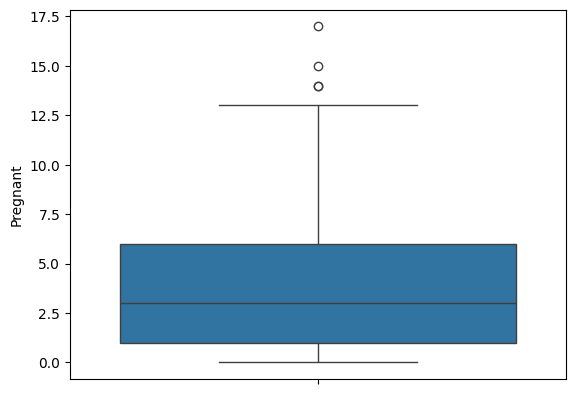

In [1476]:
import seaborn as sns
sns.boxplot(df['Pregnant'])

In [1477]:
df['Pregnant'].skew()

0.9016739791518588

In [1478]:
df['Pregnant'].describe()

,Pregnant
count,768.000000
mean,3.845052
std,3.369578
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,17.000000


In [1479]:
df['Pregnant'].max()

17

In [1480]:
df.columns

Index(['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin',
       'BMI', 'Diabetes_Pedigree', 'Age', 'Class'],
      dtype='object')

In [1481]:
#right_skewed : df['Skin_Fold'],BMI,Diastolic_BP,Diabetes_Pedigree

In [1482]:
df['Diastolic_BP'].skew()

0.13415273171959252

In [1483]:
df['Diastolic_BP'].describe()

,Diastolic_BP
count,733.000000
mean,72.405184
std,12.382158
min,24.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,122.000000


<Axes: ylabel='Diabetes_Pedigree'>

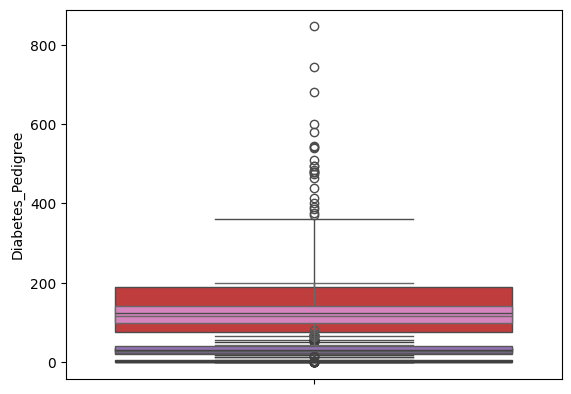

In [1484]:
sns.boxplot(df['Diabetes_Pedigree'])
sns.boxplot(df['Skin_Fold'])
sns.boxplot(df['BMI'])
sns.boxplot(df['Serum_Insulin'])
sns.boxplot(df['Age'])
sns.boxplot(df['Pregnant'])
sns.boxplot(df['Glucose'])

In [1485]:
df['Diastolic_BP'].describe()

,Diastolic_BP
count,733.000000
mean,72.405184
std,12.382158
min,24.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,122.000000


<Axes: ylabel='Skin_Fold'>

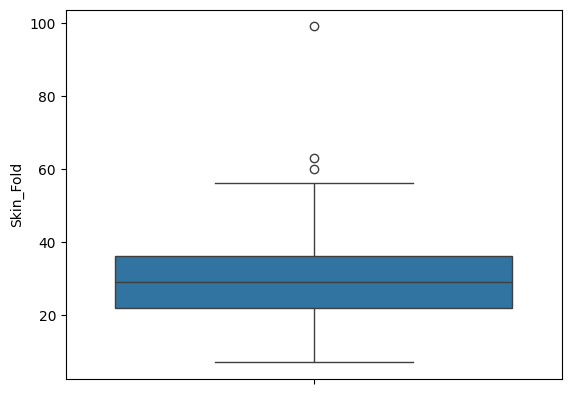

In [1486]:
sns.boxplot(df['Skin_Fold'])

In [1487]:
b5=df['Skin_Fold'].quantile(0.75)
a5=df['Skin_Fold'].quantile(0.25)
iqr5=b5-a5
iqr5
upper_l5=b5+1.5*iqr5
lower_l5=a5-1.5*iqr5
upper_l5,lower_l5

(57.0, 1.0)

In [1488]:
df['Skin_Fold']=np.where(df['Skin_Fold']>upper_l5,
                   upper_l5,
                   np.where(df['Skin_Fold']<lower_l5,
                   lower_l5,
                   df['Skin_Fold']
                     )
                   )

In [1489]:
df['Diabetes_Pedigree'].max()

2.42

In [1490]:
b4=df['Diabetes_Pedigree'].quantile(0.75)
a4=df['Diabetes_Pedigree'].quantile(0.25)
iqr4=b4-a4
b4,a4,iqr4


(0.62625, 0.24375, 0.38249999999999995)

In [1491]:
upper_l4=b4+1.5*iqr4
lower_l4=a4-1.5*iqr4
upper_l4,lower_l4

(1.2, -0.32999999999999996)

In [1492]:
df[(df['Diabetes_Pedigree']>upper_l4)]

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
12,10,139.0,80.0,NaN,NaN,27.1,1.441,57,0
39,4,111.0,72.0,47.0,207.0,37.1,1.390,56,1
45,0,180.0,66.0,39.0,NaN,42.0,1.893,25,1
58,0,146.0,82.0,NaN,NaN,40.5,1.781,44,0
100,1,163.0,72.0,NaN,NaN,39.0,1.222,33,1
147,2,106.0,64.0,35.0,119.0,30.5,1.400,34,0
187,1,128.0,98.0,41.0,58.0,32.0,1.321,33,1
218,5,85.0,74.0,22.0,NaN,29.0,1.224,32,1
228,4,197.0,70.0,39.0,744.0,36.7,2.329,31,0


In [1493]:
df['Diabetes_Pedigree']=np.where(df['Diabetes_Pedigree']>upper_l4,
                   upper_l4,
                   np.where(df['Diabetes_Pedigree']<lower_l4,
                   lower_l4,
                   df['Diabetes_Pedigree']
                     )
                   )

In [1494]:
b3=df['BMI'].quantile(0.75)
a3=df['BMI'].quantile(0.25)
iqr3=b3-a3
iqr3
upper_l3=b3+1.5*iqr3
lower_l3=a3-1.5*iqr3
upper_l3,lower_l3

(50.25, 13.849999999999998)

In [1495]:
df['BMI']=np.where(df['BMI']>upper_l3,
                   upper_l3,
                   np.where(df['BMI']<lower_l3,
                   lower_l3,
                   df['BMI']
                     )
                   )

In [1496]:
b2=df['Diastolic_BP'].quantile(0.75)
a2=df['Diastolic_BP'].quantile(0.25)
iqr2=b2-a2
iqr2

16.0

In [1497]:
upper_l2=b2+1.5*iqr2
lower_l2=a2-1.5*iqr2
upper_l2,lower_l2

(104.0, 40.0)

In [1498]:
df[(df['Diastolic_BP']>upper_l1)|(df['Diastolic_BP']<lower_l1)]

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class


In [1499]:
df['Diastolic_BP']=np.where(df['Diastolic_BP']>upper_l2,
                   upper_l2,
                   np.where(df['Diastolic_BP']<lower_l2,
                   lower_l2,
                   df['Diastolic_BP']
                     )
                   )

In [1500]:
b1=df['Serum_Insulin'].quantile(0.75)
a1=df['Serum_Insulin'].quantile(0.25)
iqr1=b1-a1
iqr1

113.75

In [1501]:
upper_l1=b1+1.5*iqr1
lower_l1=a1-1.5*iqr1
upper_l1,lower_l1

(360.625, -94.375)

In [1502]:
df[(df['Serum_Insulin']>upper_l1)|(df['Serum_Insulin']<lower_l1)]

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
8,2,197.0,70.0,45.0,543.0,30.50,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.10,0.398,59,1
111,8,155.0,62.0,26.0,495.0,34.00,0.543,46,1
153,1,153.0,82.0,42.0,485.0,40.60,0.687,23,0
186,8,181.0,68.0,36.0,495.0,30.10,0.615,60,1
220,0,177.0,60.0,29.0,478.0,34.60,1.072,21,1
228,4,197.0,70.0,39.0,744.0,36.70,1.200,31,0
231,6,134.0,80.0,37.0,370.0,46.20,0.238,46,1
247,0,165.0,90.0,33.0,680.0,50.25,0.427,23,0
248,9,124.0,70.0,33.0,402.0,35.40,0.282,34,0


In [1503]:
df['Serum_Insulin']=np.where(df['Serum_Insulin']>upper_l1,
                   upper_l1,
                   np.where(df['Serum_Insulin']<lower_l1,
                   lower_l1,
                   df['Serum_Insulin']
                     )
                   )

<Axes: ylabel='Serum_Insulin'>

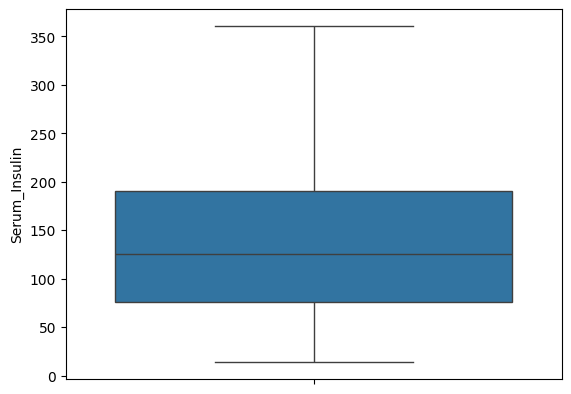

In [1504]:
sns.boxplot(df['Serum_Insulin'])

In [1505]:
#from sklearn.preprocessing import FunctionTransformer
#ft=FunctionTransformer(np.log)

In [1506]:
#df['Serum_Insulin']=ft.fit_transform(df[['Serum_Insulin']])


In [1507]:
df['Serum_Insulin'].skew()

0.9539010274825211

<ipython-input-1508-f1f8eedf0df9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Serum_Insulin'])


<Axes: xlabel='Serum_Insulin', ylabel='Density'>

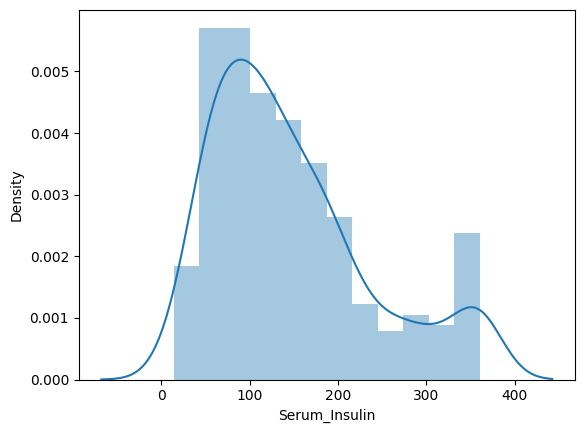

In [1508]:
sns.distplot(df['Serum_Insulin'])

In [1509]:
df['Age'].skew()

1.1295967011444805

In [1510]:
df['Age'].describe()

,Age
count,768.000000
mean,33.240885
std,11.760232
min,21.000000
25%,24.000000
50%,29.000000
75%,41.000000
max,81.000000


In [1511]:
q3=df['Age'].quantile(0.75)
q1=df['Age'].quantile(0.25)

In [1512]:
iqr=q3-q1
iqr

17.0

In [1513]:
upper_l=q3+1.5*iqr
lower_l=q1-1.5*iqr
upper_l,lower_l

(66.5, -1.5)

In [1514]:
df[(df['Age']>upper_l)]

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
123,5,132.0,80.0,NaN,NaN,26.8,0.186,69,0
363,4,146.0,78.0,NaN,NaN,38.5,0.520,67,1
453,2,119.0,NaN,NaN,NaN,19.6,0.832,72,0
459,9,134.0,74.0,33.0,60.0,25.9,0.460,81,0
489,8,194.0,80.0,NaN,NaN,26.1,0.551,67,0
537,0,57.0,60.0,NaN,NaN,21.7,0.735,67,0
666,4,145.0,82.0,18.0,NaN,32.5,0.235,70,1
674,8,91.0,82.0,NaN,NaN,35.6,0.587,68,0
684,5,136.0,82.0,NaN,NaN,NaN,0.640,69,0


In [1515]:
df['Age']=np.where(df['Age']>upper_l,
                   upper_l,
                   np.where(df['Age']<lower_l,
                   lower_l,
                   df['Age']
                     )
                   )

In [1516]:
df['Age'][123]

66.5

<Axes: ylabel='Age'>

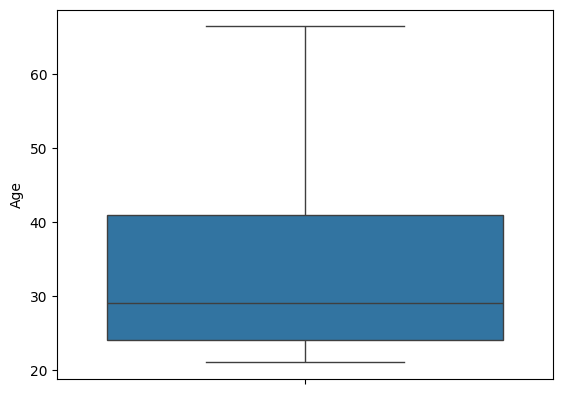

In [1517]:
sns.boxplot(df['Age'])

In [1518]:
#df['Age']=ft.fit_transform(df[['Age']])

<ipython-input-1519-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

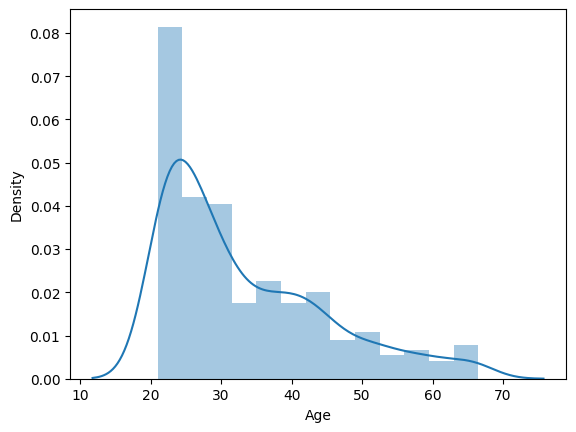

In [1519]:
sns.distplot(df['Age'])

In [1520]:
df['Age'].skew()

1.0671703233262797

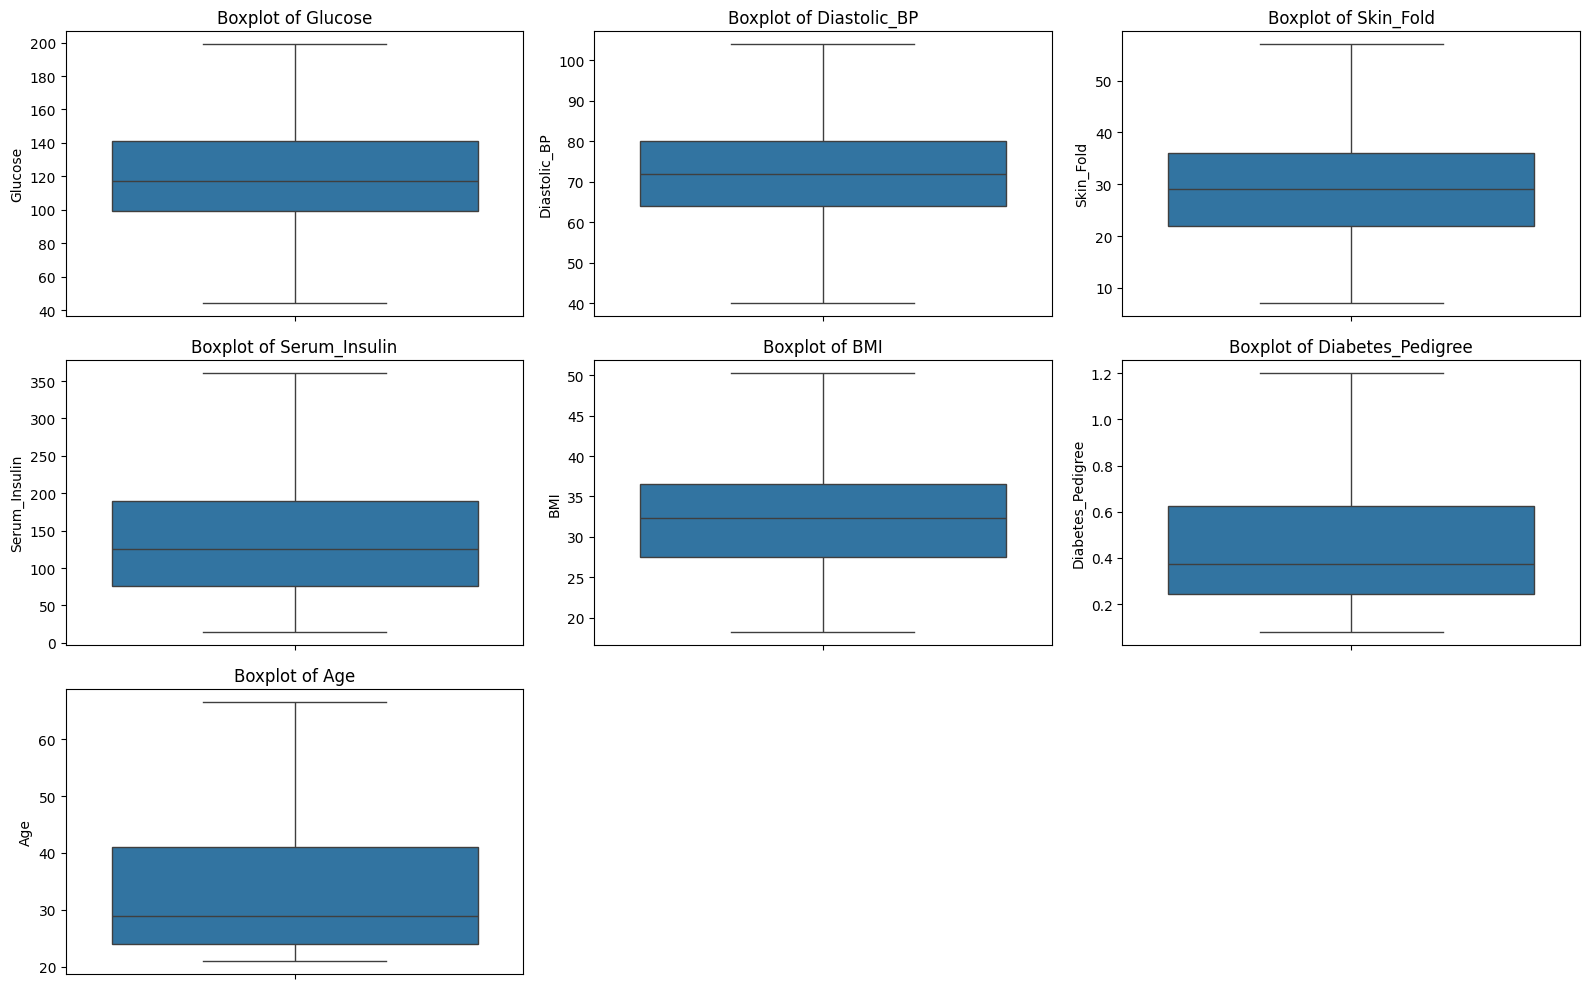

In [1521]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot grid
plt.figure(figsize=(16, 10))

# Select the columns to plot
columns_to_check = ['Glucose', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin', 'BMI', 'Diabetes_Pedigree', 'Age']

# Create boxplots for each column
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [1522]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:8],df.iloc[:,-1],test_size=0.2,random_state=42)

In [1523]:
x_train.shape

(614, 8)

In [1524]:
si=SimpleImputer(add_indicator=True)
x_train=si.fit_transform(x_train)
x_test=si.transform(x_test)

In [1525]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [1526]:
x_train.shape,x_test.shape

((614, 13), (154, 13))

In [1527]:
x_train

array([[-5.26396861e-01, -1.25832567e+00, -1.21306756e-15, ...,
         1.57754124e+00,  1.05699640e+00,  9.31205056e+00],
       [ 1.58804586e+00, -3.27397242e-01,  8.32641598e-01, ...,
        -6.33897850e-01,  1.05699640e+00, -1.07387733e-01],
       [-8.28460107e-01,  5.70283740e-01, -2.24039186e+00, ...,
        -6.33897850e-01, -9.46077020e-01, -1.07387733e-01],
       ...,
       [ 1.89010910e+00, -6.93119124e-01,  1.17408976e+00, ...,
        -6.33897850e-01,  1.05699640e+00, -1.07387733e-01],
       [-1.13052335e+00,  6.36778628e-01, -1.21306756e-15, ...,
         1.57754124e+00,  1.05699640e+00, -1.07387733e-01],
       [-1.13052335e+00,  1.04819527e-01,  2.02771017e+00, ...,
         1.57754124e+00,  1.05699640e+00, -1.07387733e-01]])

In [1567]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [1529]:
model=Sequential()

In [1530]:
model.add(Dense(40,activation='relu',input_dim=13,kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model.add(Dropout(rate=0.5,seed=5))
model.add(Dense(40,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model.add(Dropout(rate=0.5,seed=5))
model.add(Dense(40,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.05)))
model.add(Dropout(rate=0.5,seed=5))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [1531]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_128 (Dense)                    │ (None, 40)                  │             560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_87 (Dropout)                 │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_129 (Dense)                    │ (None, 40)                  │           1,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_88 (Dropout)                 │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 40)                  │           1,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_89 (Dropout)                 │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,881 (15.16 KB)

 Trainable params: 3,881 (15.16 KB)

 Non-trainable params: 0 (0.00 B)

In [1532]:
from keras.optimizers import Adam
adam=Adam(learning_rate=0.001)

In [1533]:
from keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss',patience=3)
from tensorflow.keras.callbacks import ReduceLROnPlateau
#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [1534]:
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [1535]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=700,callbacks=callback)

Epoch 1/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3876 - loss: 5.6605 - val_accuracy: 0.5519 - val_loss: 4.8347
Epoch 2/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5031 - loss: 4.7123 - val_accuracy: 0.6623 - val_loss: 4.1240
Epoch 3/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5390 - loss: 4.0329 - val_accuracy: 0.6429 - val_loss: 3.5228
Epoch 4/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6005 - loss: 3.4146 - val_accuracy: 0.6429 - val_loss: 3.0101
Epoch 5/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6162 - loss: 2.9102 - val_accuracy: 0.6429 - val_loss: 2.5762
Epoch 6/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6388 - loss: 2.4953 - val_accuracy: 0.6429 - val_loss: 2.2159
Epoch 7/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6467 - loss: 2.1528 - val_accuracy: 0.6429 - val_loss: 1.9163
Epoch 8/700
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6707 - loss: 1.8418 - val_accuracy: 0.6429 - 

In [1568]:
y_log=model.predict(x_test).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [1537]:
y_pred=np.where(y_log>0.5,1,0)

In [1538]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7662337662337663

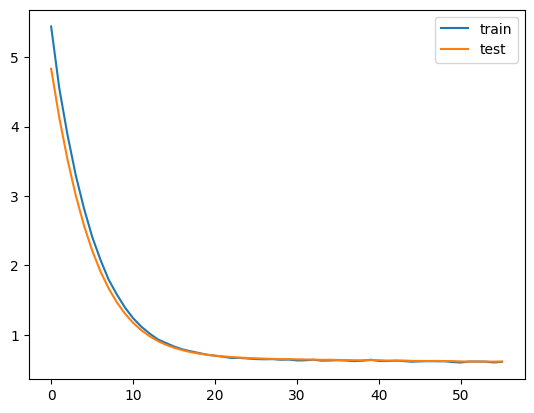

In [1539]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

[]

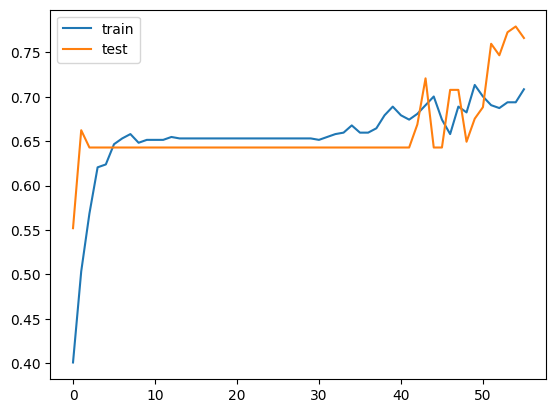

In [1540]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.plot()

In [1541]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier()
clf1.fit(x_train,y_train)
y_pred1=clf1.predict(x_test)

In [1542]:
accuracy_score(y_test,y_pred1)

0.6948051948051948

In [1543]:
clf2=RandomForestClassifier(bootstrap=True,n_estimators=1000)
clf2.fit(x_train,y_train)
y_pred3=clf2.predict(x_test)
accuracy_score(y_test,y_pred3)

0.7467532467532467

In [1544]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=50)
lr.fit(x_train,y_train)
y_pred4=lr.predict(x_test)


In [1545]:
accuracy_score(y_test,y_pred4)

0.7662337662337663

In [1549]:
from sklearn.model_selection import GridSearchCV

In [1569]:
combined_preds = (y_log + y_pred1 + y_pred3) / 3


In [1587]:
final_preds = np.where(combined_preds > 0.5, 1, 0)
final_preds

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [1588]:
ensemble_accuracy = accuracy_score(y_test, final_preds)
ensemble_accuracy

0.7467532467532467

In [1589]:
a=y_test-final_preds

In [1590]:
a.value_counts()

,count
Class,
0,115
1,24
-1,15
